## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [2]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = ("https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt")

In [3]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [4]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = "\n"

data = data.split(split_tag)
print(len(data))
data[0]

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [6]:
import pandas as pd

arrange_data=data   
df = pd.DataFrame(arrange_data)
df.head()

,0
0,n00015388_157\thttp://farm1.static.flickr.com/...
1,n00015388_238\thttp://farm2.static.flickr.com/...
2,n00015388_304\thttp://farm1.static.flickr.com/...
3,n00015388_327\thttp://farm4.static.flickr.com/...
4,n00015388_355\thttp://img100.imageshack.us/img...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

0    n00015388_157\thttp://farm1.static.flickr.com/...
Name: 0, dtype: object
<class 'pandas.core.series.Series'>
http://farm1.static.flickr.com/145/430300483_21e993670c.jpg


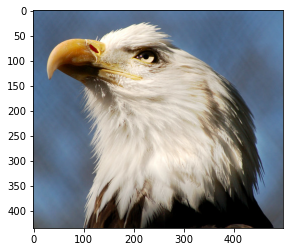

In [36]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import requests


# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0]
print(first_link)
print(type(first_link))
first_link_split=first_link.str.split()[0][1]
print(first_link_split)

response = requests.get(first_link_split)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [40]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list=url_list.str.split()
    return img_list

In [38]:
result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

KeyError: 1